# Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Handwritten digits data set

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Problem statement

In [3]:
# This is Handwritten digits classification dataset. The aim is to classify the image in range from 0 to 9.
# This is multiclassification task.
# First attempt is to check with CNN model.

# Basic checks

In [4]:
len(x_train)

60000

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# we have 60000 images in x_train and image size is 28 by 28 grid.

In [7]:
len(x_test)

10000

# Data or Image visualization

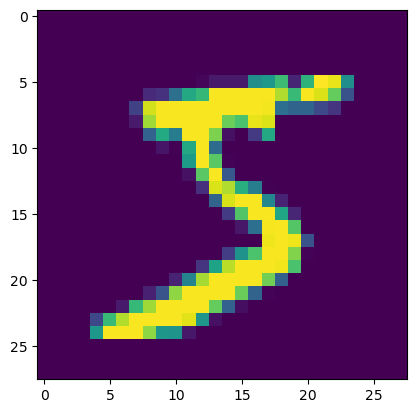

In [8]:
plt.imshow(x_train[0]) 

(28, 28)

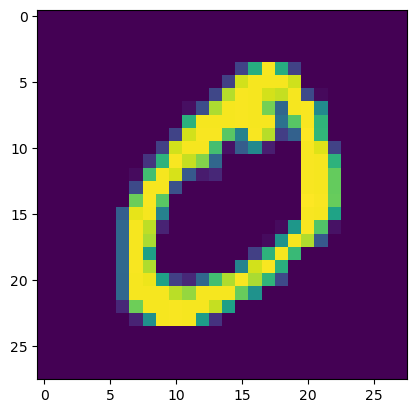

In [9]:
plt.imshow(x_train[1])
x_train[1].shape

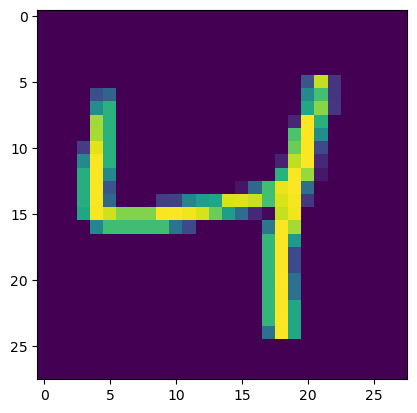

In [10]:
plt.imshow(x_train[2])

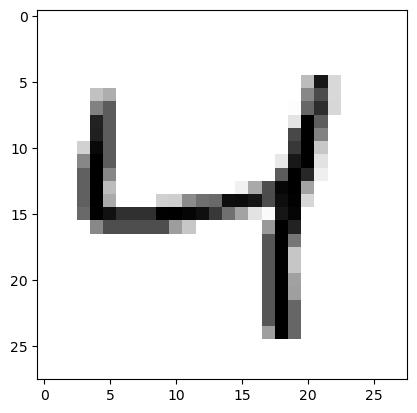

In [11]:
# To check whether it is color image or binary image
plt.imshow(x_train[2], cmap=plt.cm.binary)

# Data pre processing

In [12]:
# Images are not in colored (RGB). They are in single channel (0 to 255)

In [13]:
x_train[0].ndim

2

In [14]:
x_train[0], # Each pixel before normalization.its a two dimensional array
# o is black and 255 is white

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [15]:
x_train[0].min()

0

In [16]:
x_train[0].max()

255

# Scaling of the data

In [17]:
# The values are ranging from 0 to 255 which needs to be scaled in between o to 1 before fitting into a model
# There are two ways to scale the data. One is dividing the data by its highest value which is 255. So it should be divided by 255 to get values in between 0 & 1.
# Second one is normalization
# Here proceeded with normalization

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [19]:
x_train[0], # Pixel after normalization

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

# CNN model creation

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

In [21]:
model = Sequential()

# First convolution layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1))) # 64 filters, Filter size is 3,3.
model.add(Activation("relu")) # relu is for making it Non linear. Coverts all the negative values to zero.
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling is to reduce the spatial dimensions of the input & computational complexity

# Second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1
model.add(Flatten()) # Flattening is to convert two dimensional array to one dimension. This will be feeded to final neural network
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Fully connected layer 3
model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )

# Fitting Model

In [24]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 128s 67ms/step - loss: 0.2650 - accuracy: 0.9184
Epoch 2/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0836 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0591 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] 

# Model prediction

In [25]:
y_predict=model.predict(x_test)
y_predict[1]

313/313 [==============================] - 7s 22ms/step


array([1.26570745e-08, 5.03042275e-09, 9.99999523e-01, 1.41190837e-10,
       9.18056575e-10, 1.39353064e-14, 3.08161024e-10, 4.24328221e-07,
       5.01139824e-11, 5.60075510e-12], dtype=float32)

In [26]:
y_predict[1].argmax()

2

In [27]:
y_test[1] 

2

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[0]

7

# Model evaluation

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [30]:
Accuracy = accuracy_score(y_test,y_predicted_labels)
Accuracy

0.9871

In [31]:
cm = confusion_matrix(y_test,y_predicted_labels)
cm

array([[ 962,    1,    2,    0,    1,    2,    2,    4,    0,    6],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1020,    2,    1,    0,    0,    8,    0,    0],
       [   0,    0,    4,  997,    0,    7,    0,    0,    1,    1],
       [   0,    2,    0,    0,  973,    0,    0,    0,    0,    7],
       [   3,    0,    0,    4,    0,  879,    4,    1,    0,    1],
       [   4,    2,    1,    0,    1,    2,  947,    0,    1,    0],
       [   1,    6,   10,    0,    0,    1,    0, 1007,    1,    2],
       [   0,    0,    4,    2,    0,    3,    1,    0,  957,    7],
       [   2,    1,    0,    0,    5,    4,    1,    0,    1,  995]],
      dtype=int64)

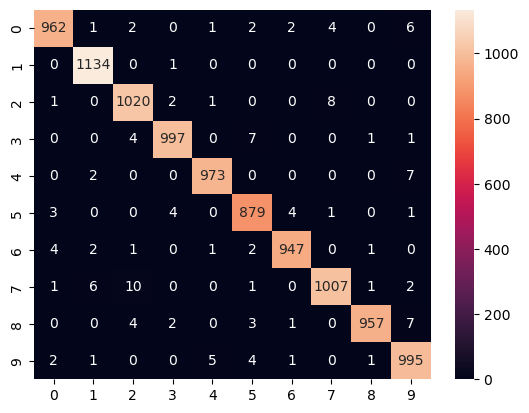

In [32]:
import seaborn as sns
heatmap = sns.heatmap(cm,annot=True,fmt='d')

In [33]:
CR = classification_report(y_test,y_predicted_labels)
print(CR)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# KNN Model 

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#image is 28 by 28 grid and two dimensional array.
# Two dimensional array need to be converted to one dimension before fitting.
# This process is called flattening.
# Since it is 28 by 28 grid, then we should get 784(28*28) elements in one dimensional array

In [38]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [39]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [40]:
len(x_train_flattened[0])

784

In [41]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

### K vs Error rate

In [78]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_flattened,y_train)
    pred_i=knn.predict(x_test_flattened)
    error_rate.append(np.mean(pred_i!=y_test))

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Text(0, 0.5, 'Error rate')

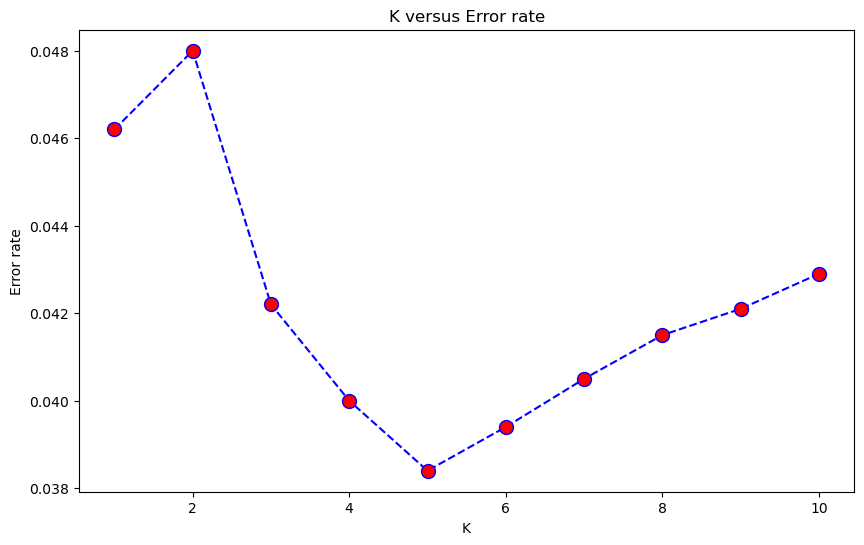

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel("Error rate")

In [47]:
# based on the above graph, the error rate is less at K = 5.

# Model fitting

In [88]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flattened,y_train)
pred_i=knn.predict(x_test_flattened)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model prediction

In [89]:
y_predict= knn.predict(x_test_flattened)
y_predict[1]

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


2

In [51]:
y_test[1]

2

# Model evaluation by importing metrics

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [90]:
Accuracy = accuracy_score(y_test,y_predict)
Accuracy

0.9616

In [54]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 974,    1,    0,    0,    0,    1,    3,    0,    0,    1],
       [   0, 1130,    3,    0,    0,    0,    2,    0,    0,    0],
       [  17,    3,  971,    6,    0,    0,    3,   16,   16,    0],
       [   2,    4,    3,  970,    1,    6,    0,    8,   11,    5],
       [   1,    3,    2,    0,  942,    0,    7,    1,    1,   25],
       [   7,    4,    0,   30,    0,  826,    9,    1,   10,    5],
       [  11,    4,    0,    0,    1,    0,  941,    0,    1,    0],
       [   3,   17,   10,    1,    4,    0,    0,  981,    0,   12],
       [  10,    6,    2,    9,    8,    7,    3,   11,  914,    4],
       [   6,    6,    4,   12,    6,    1,    2,   10,    5,  957]],
      dtype=int64)

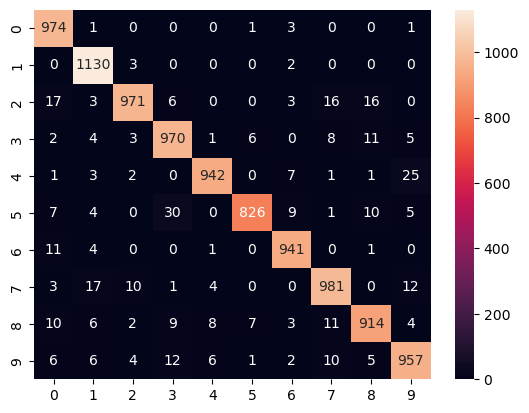

In [55]:
heatmap = sns.heatmap(cm,annot=True,fmt='d')

In [56]:
classification = classification_report(y_test,y_predict)
print(classification)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.93      0.95       892
           6       0.97      0.98      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.94      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# SVM Model

In [58]:
from sklearn import svm

# Support vector classifier model with linear kernel 

In [59]:
model_linear = svm.SVC(kernel='linear',degree=3, gamma='scale')
model_linear.fit(x_train_flattened,y_train)

SVC(kernel='linear')

# Model prediction

In [73]:
y_predict=model_linear.predict(x_test_flattened)
y_predict[0]

7

In [74]:
y_test[0]

7

# Model evaluation

In [68]:
model_linear.score(x_test_flattened,y_test)

0.942

In [70]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1021
           1       0.99      0.98      0.98      1147
           2       0.94      0.93      0.93      1046
           3       0.94      0.90      0.92      1045
           4       0.96      0.95      0.95      1000
           5       0.88      0.93      0.90       847
           6       0.96      0.95      0.95       965
           7       0.94      0.97      0.95       997
           8       0.91      0.92      0.91       958
           9       0.92      0.95      0.93       974

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Another model with RBF kernel

In [62]:
model_RBF = svm.SVC(kernel='rbf',degree=3, gamma='scale')
model_RBF.fit(x_train_flattened,y_train)

SVC()

# Model prediction

In [76]:
y_predict2=model_RBF.predict(x_test_flattened)
y_predict2[0]

7

In [77]:
y_test[0]

7

# Model evaluation

In [65]:
model_RBF.score(x_test_flattened,y_test)

0.979

In [67]:
print(classification_report(y_predict2,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       995
           1       0.99      0.99      0.99      1142
           2       0.98      0.98      0.98      1034
           3       0.98      0.97      0.98      1021
           4       0.98      0.98      0.98       986
           5       0.97      0.99      0.98       878
           6       0.98      0.99      0.98       955
           7       0.97      0.98      0.98      1023
           8       0.97      0.97      0.97       981
           9       0.96      0.98      0.97       985

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

